# Read data from "../data/euro12.csv"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.cm as cmap
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
from pathlib import Path

euro12 = pd.read_csv("../data/euro12.csv")

euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


# Bar plots: Goals for each team
Desired output
![title](images/bars.png)

For custom legend: https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html

Use plt.tight_layout() to fit plots within your figure cleanly: https://matplotlib.org/stable/tutorials/intermediate/tight_layout_guide.html

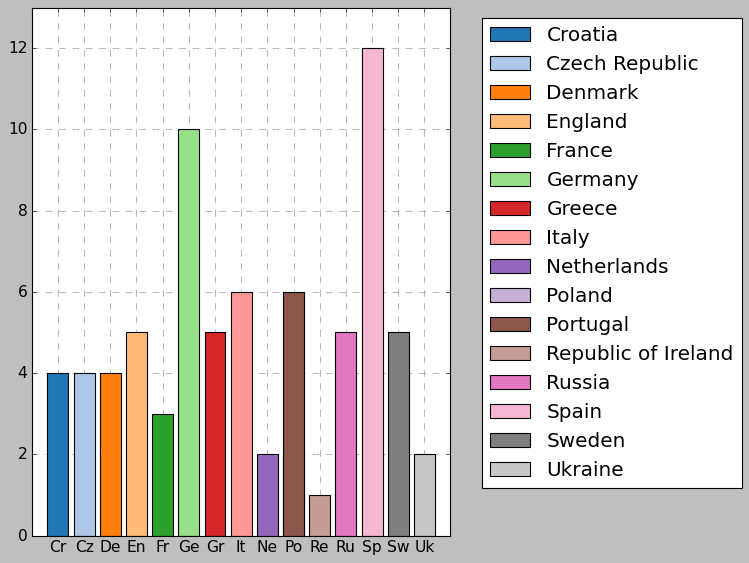

In [3]:
# Generate main figure
plt.style.use("classic")
fig, ax = plt.subplots(1, 1, figsize=(6.75, 8.25))
ax.set_axisbelow(True)  # To put ticks and grid BELOW other objs

# Generate legend
colors = cmap.get_cmap("tab20").colors[:euro12.shape[0]]
teams = euro12["Team"]
legend = [Patch(facecolor=color, edgecolor="k", label=team) for color, team in zip(colors, teams)]
euro12["Tag"] = euro12["Team"].str[:2]

# Generate plot
ax.bar(x="Tag", height="Goals", color=colors, data=euro12)

# Add legend
ax.legend(handles=legend, bbox_to_anchor=(1.72, 1), prop=dict(size=18))

# Tweak plot
ax.grid(linestyle="--", color="gray")
ax.set(ylim=[0, 13])
ax.set_xmargin(0.04)
ax.tick_params(axis="both", which="major", labelsize=14)
ax.tick_params(axis="both", which="minor", labelsize=14)

# Scatter plots of "Shots off target", "Players Used", "Touches", "Saves made" with respect to "Goals"

Desired output
![title](images/scatters.png)

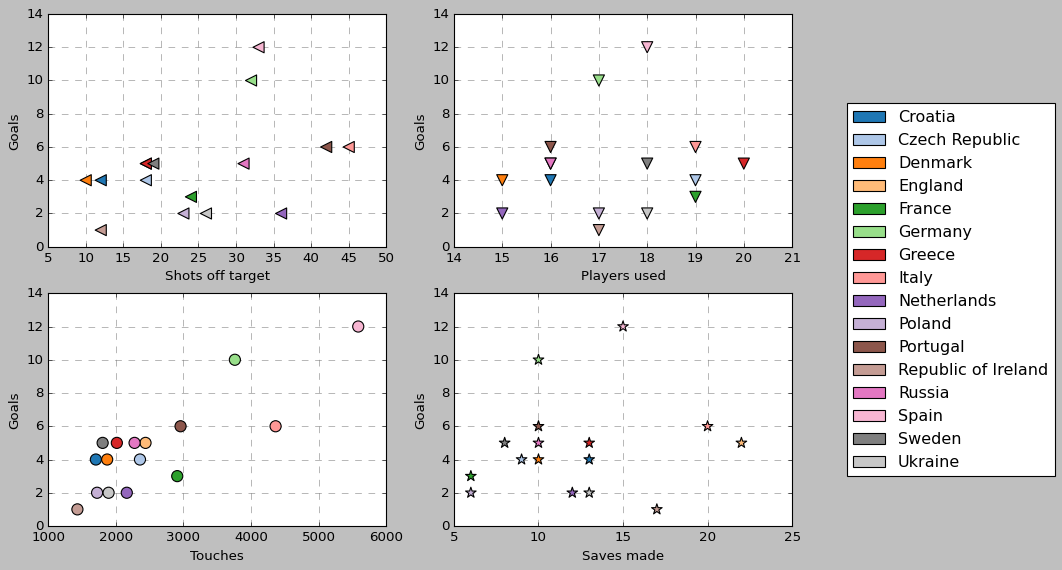

In [4]:
# X-axis and Y-axis labels were swapped in the provided image

# Generate main figure
plt.style.use("classic")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Generate legend
colors = cmap.get_cmap("tab20").colors[:euro12.shape[0]]
teams = euro12["Team"]
legend = [Patch(facecolor=color, edgecolor="k", label=team) for color, team in zip(colors, teams)]

# Generate "Shots off target" plot
axes[0, 0].scatter(data=euro12, x="Shots off target", y="Goals", marker="<", c=colors, s=100)
axes[0, 0].set(xlabel="Shots off target", ylabel="Goals")

# Generate "Players Used" plot
axes[0, 1].scatter(data=euro12, x="Players Used", y="Goals", marker="v", c=colors, s=100)
axes[0, 1].set(xlabel="Players used", ylabel="Goals")

# Generate "Touches" plot
axes[1, 0].scatter(data=euro12, x="Touches", y="Goals", marker="o", c=colors, s=100)
axes[1, 0].set(xlabel="Touches", ylabel="Goals")

# Generate "Saves made" plot
axes[1, 1].scatter(data=euro12, x="Saves made", y="Goals", marker="*", c=colors, s=100)
axes[1, 1].set(xlabel="Saves made", ylabel="Goals")

# Add legend
axes[0][0].legend(handles=legend, bbox_to_anchor=(3, 0.65))

# Tweak plot
for ax in axes.flatten():
    ax.set_axisbelow(True)  # To put ticks and grid BELOW other objs
    ax.grid(linestyle="--", color="gray")

# Regression plot with seaborn
Desired output
![title](images/regressions.png)

See https://seaborn.pydata.org/generated/seaborn.regplot.html

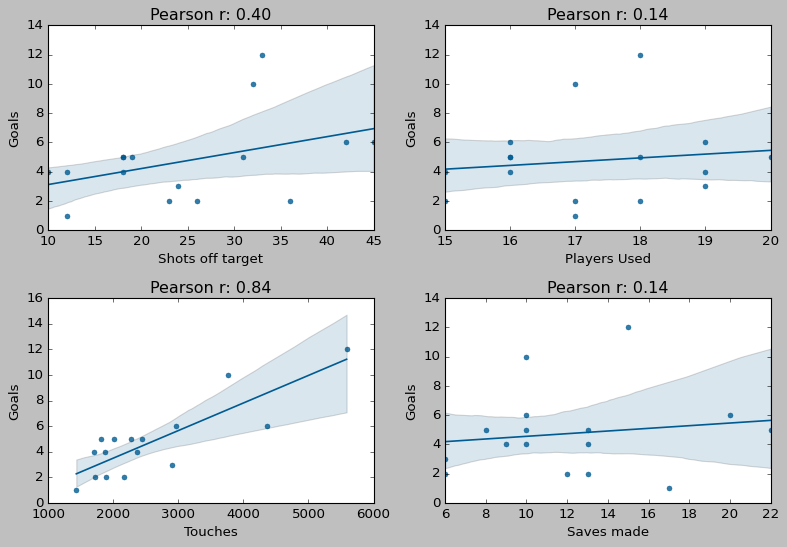

In [5]:
# X-axis and Y-axis labels were swapped in the provided image

# Import necessary packages
import seaborn as sns
from scipy.stats import pearsonr

# Generate main figure
plt.style.use("classic")
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# Generate "Shots off target" plot
sns.regplot(data=euro12, x="Shots off target", y="Goals", ax=axes[0, 0], color=sns.color_palette("ocean")[3])
correlation = pearsonr(euro12["Shots off target"], euro12["Goals"])[0]
axes[0, 0].set(title="Pearson r: " + "{:.2f}".format(correlation))

# Generate "Players Used" plot
sns.regplot(data=euro12, x="Players Used", y="Goals", ax=axes[0, 1], color=sns.color_palette("ocean")[3])
correlation = pearsonr(euro12["Players Used"], euro12["Goals"])[0]
axes[0, 1].set(title="Pearson r: " + "{:.2f}".format(correlation))

# Generate "Touches" plot
sns.regplot(data=euro12, x="Touches", y="Goals", ax=axes[1, 0], color=sns.color_palette("ocean")[3])
correlation = pearsonr(euro12["Touches"], euro12["Goals"])[0]
axes[1, 0].set(title="Pearson r: " + "{:.2f}".format(correlation))

# Generate "Saves made" plot
sns.regplot(data=euro12, x="Saves made", y="Goals", ax=axes[1, 1], color=sns.color_palette("ocean")[3])
correlation = pearsonr(euro12["Saves made"], euro12["Goals"])[0]
axes[1, 1].set(title="Pearson r: " + "{:.2f}".format(correlation))

# Tweak plot
fig.tight_layout()

# Correlation Matrix
Desired output
![title](images/correlation_matrix.png)

See ax.matshow https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.matshow.html

See dataframe.corr()https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

Text(0.48, 1.04, 'Correlation matrix')

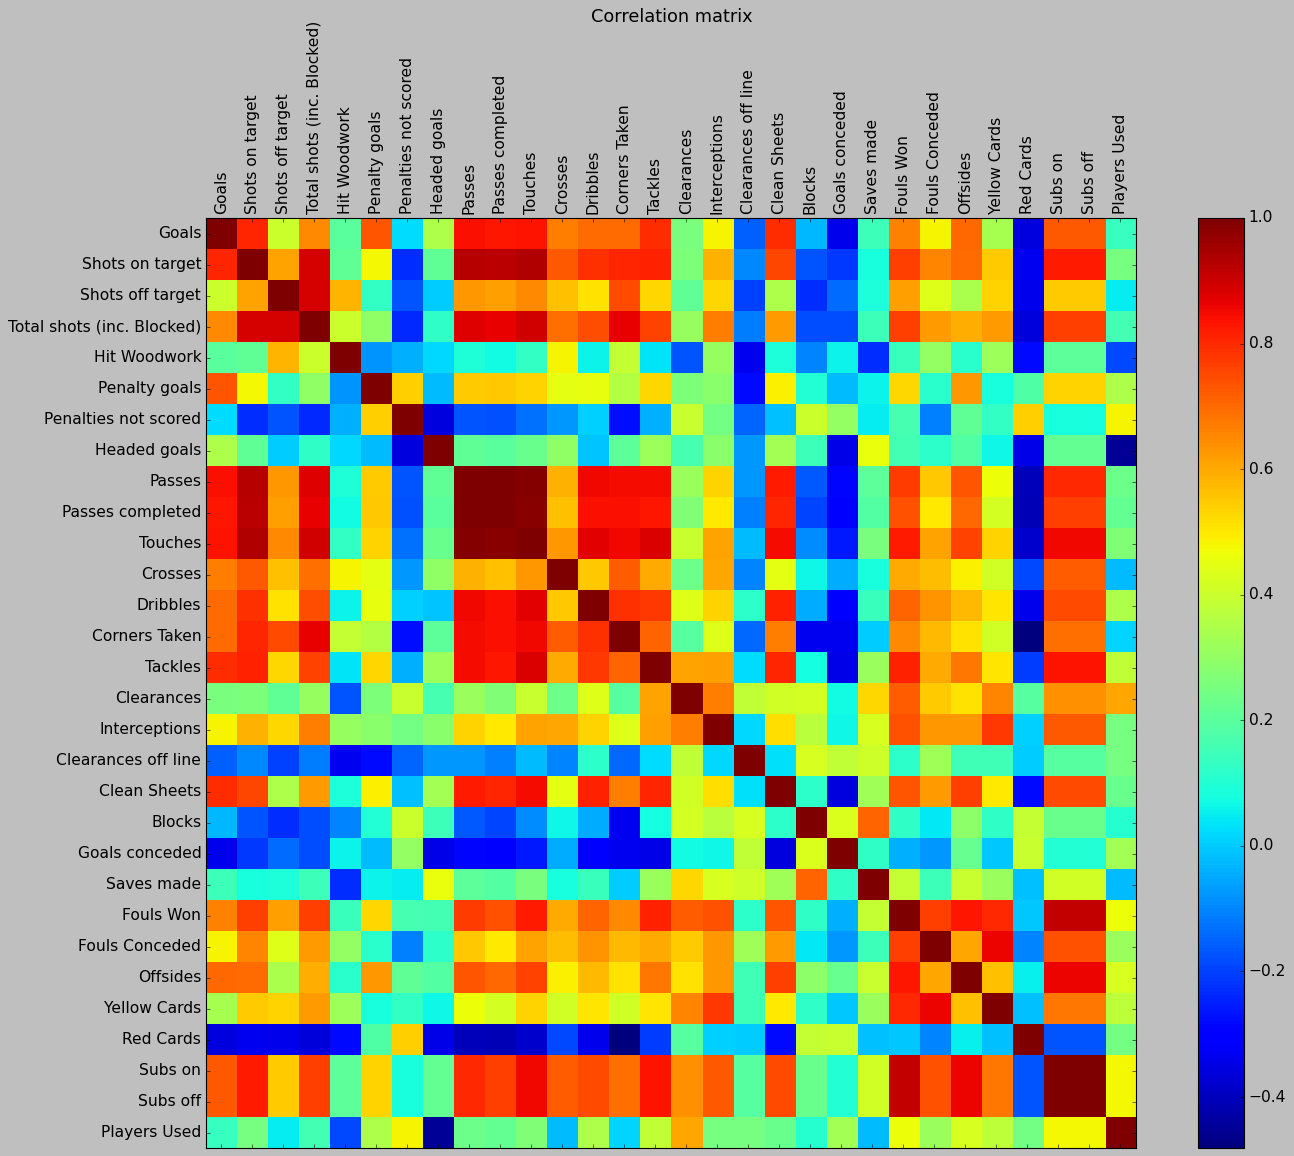

In [6]:
# Generate main figure
plt.style.use("classic")
fig = plt.figure(figsize=(20, 15))

# Generate correlation matrix
correlation = euro12.corr()
plt.matshow(correlation, fignum=fig.number)

# Add ticks
dtypes = euro12.select_dtypes(["number"])
plt.xticks(range(dtypes.shape[1]), dtypes.columns, fontsize=14, rotation="vertical")
plt.yticks(range(dtypes.shape[1]), dtypes.columns, fontsize=14)

# Add colorbar
plt.colorbar().ax.tick_params(labelsize=14)

# Add title
fig.suptitle("Correlation matrix", fontsize=16, x=0.48, y=1.04)